### 접근
- 압축한 SCC를 기반으로 새로운 그래프를 구성한다.
  - set을 사용하면 될 것 같다.
- 진입 차수가 0인 노드를 시작점으로 가중치를 더한다.
  - SCC단위로 가중치의 합을 미리 구해놓는다.
- 이런, 문제를 읽어보니 시작지점은 정해져있었다.
  - 이러면 시작 지점을 기준으로 위상정렬 하면 될 것 같다
- 레스토링; 아무 레스토랑 중 하나를 그래프의 마지막으로 정할 수 있다는 의미인 것 같다.
- (고려) 최종 진입 지점이 레스토랑이 아니라면 그곳을 정답에 포함시키면 안된다.
- (고려) 시작지점의 진입 차수가 0이 아닐 수 있다. 이러면 위상정렬할 때 어떻게 되는걸까?
  - 처음의 아이디어를 이용하고 위상정렬 대신 BFS로 구현해보는 것으로 접근해본다. 진입차수는 계산하지 않는다.

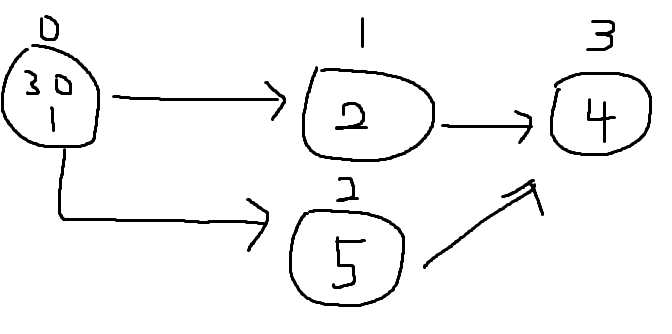

In [ ]:
import os, io
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def tarjan(G): #O(N+M)
  SCC, S, P = [], [], []
  D = [0] * len(G)
 
  s = [*range(len(G))]
  while s:
    x = s.pop()
    if x < 0:
      d = D[~x] - 1
      if P[-1] > d:
        SCC.append(S[d:])
        del S[d:], P[-1]
        for x in SCC[-1]:
          D[x] = -1
    elif D[x] > 0:
      while P[-1] > D[x]:
        P.pop()
    elif D[x] == 0:
      S.append(x)
      P.append(len(S))
      D[x] = len(S)
      s.append(~x)
      s += G[x]
  return SCC[::-1]

def sol():
  N, M = map(int, input().split())
  G = [[] for _ in range(N)]
  for _ in range(M):
    u, v = map(int, input().split())
    G[u-1].append(v-1)
  
  W = [0] * N
  for i in range(N):
    W[i] = int(input())

  SCC = {}
  for i, scc in enumerate(tarjan(G)): #O(1)만에 몇 번 SCC에 속하는지 찾을 수 있게 해싱한다. (O(N)
    for v in scc:
      SCC[v] = i 
  
  G2 = [set() for _ in range(i + 1)]
  for i, V in enumerate(G): 
    for v in V:
      if SCC[i] != SCC[v]: #즉 i번째 정점이 속한 압축 SCC 번호 a에서 v번째 정점이 속한 압축 SCC 번호로 가는 간선b가 있다면 = a -> b로 가는 간선
        G2[SCC[i]].add(SCC[v])
  print(G2)
  

  S, p = map(int, input().split())
  P = [*map(int, input().split())]

sol()